In this assignment, you'll practice some data manipulation in pandas, and perform a simple regression task using the Abalone data set from the UCI repository

Abalone are a type of mollusk (you may have eaten one before).  Each row of this data set is an individual abalone, with a variety of measurements.  You can learn about the age of an abalone by counting rings in its shell (kind of like counting tree rings).  

https://archive.ics.uci.edu/ml/datasets/Abalone

This link describes the data.  Take a look at the attribute information so you know what each column is referring to.

Please put all your code into a single script `hw2.py`, which will generate the image `regression.png`.  Submit both files to canvas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 10)

# 1. Read the data into a DataFrame

use pandas to read the data at this link into a DataFrame:
https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

Hints: 
* decide if `pd.read_table` or `pd.read_csv` is more appropriate.
* you can pass the url provided as a string (like in the Lecture 5 exercise)
* You'll want to pass in at least 2 keyword arguments:
    - names - a list of column names ("sex", "length", "diam", "height", wt_whole", "wt_shucked", "wt_viscera", "wt_shell", "rings")
    - index_col=False - indicates that pandas should just create an index for each entry (we don't have ids for the data)

In [3]:
fname = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
fname = "../abalone.data"
df = pd.read_csv(fname, 
                   names=["sex", "length", "diam", "height", "wt_whole", "wt_shucked", "wt_viscera", "wt_shell", "rings"],
                   index_col=False)

In [4]:
df

,sex,length,diam,height,wt_whole,wt_shucked,wt_viscera,wt_shell,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.describe()

,length,diam,height,wt_whole,wt_shucked,wt_viscera,wt_shell,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 2. Set up the data for a regression problem

The problem we're going to try to solve is to predict the number of rings in an abalone shell (the "rings" column) from the other features. This is a proxy for the age of the animal.

This means we want a response vector `y` that contains the data in the `"rings"` column, and a design matrix `X` that contains all the data we'll use to predict the response (the other columns).

Use the pasty library's `dmatrices` function to form your data and response matrices (see lecture 6 for an example).  

Hints:
* Since `"sex"` is categorical you'll want to use `C(sex)` in your model specification.

In [8]:
from patsy import dmatrices

In [9]:
y, X = dmatrices("rings ~ C(sex) + length + diam + height + wt_whole + wt_shucked + wt_viscera + wt_shell", 
                 df, return_type="dataframe")

you'll see that X has a column called `"Intercept"`.  We will not need this column, so remove it from the dataframe.

```python
X.drop(X[["Intercept"]], axis=1, inplace=True)
```

In [10]:
X.drop(X[['Intercept']], axis=1, inplace=True)

In [11]:
X

,C(sex)[T.I],C(sex)[T.M],length,diam,height,wt_whole,wt_shucked,wt_viscera,wt_shell
0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


# 3. Split the data into train and test sets

Now, we're going to start using Scikit learn.

Split your data into train and test sets (See lecture 6 for an example)

Set your test size to be 30% of the data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
X_train

,C(sex)[T.I],C(sex)[T.M],length,diam,height,wt_whole,wt_shucked,wt_viscera,wt_shell
1552,1.0,0.0,0.390,0.285,0.100,0.2810,0.1275,0.0620,0.077
1840,1.0,0.0,0.430,0.340,0.100,0.3405,0.1395,0.0665,0.120
216,0.0,1.0,0.450,0.350,0.130,0.4600,0.1740,0.1110,0.135
3085,1.0,0.0,0.255,0.185,0.060,0.0925,0.0390,0.0210,0.025
3033,0.0,1.0,0.535,0.410,0.120,0.6835,0.3125,0.1655,0.159
...,...,...,...,...,...,...,...,...,...
3489,0.0,0.0,0.530,0.420,0.140,0.6270,0.2905,0.1165,0.183
1978,0.0,1.0,0.700,0.550,0.175,1.4405,0.6565,0.2985,0.375
1442,1.0,0.0,0.410,0.320,0.095,0.2905,0.1410,0.0630,0.073
219,0.0,0.0,0.415,0.305,0.130,0.3200,0.1305,0.0755,0.105


# 4. Fit a Linear Regression model to the data

1. Use Scikit learn's linear regression class to fit the model: `from sklearn.linear_model import LinearRegression`
2. Use your training data to fit the model
3. Predict the number of rings in your test data using the `predict` method.
4. create a scatter plot of your prediction vs. the true number of rings.  Save this figure as `regression.png` and sumbit it with your homework

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.score(X_test, y_test)

0.5443215009320046

In [17]:
import matplotlib.pyplot as plt

In [18]:
predicted = model.predict(X_test)

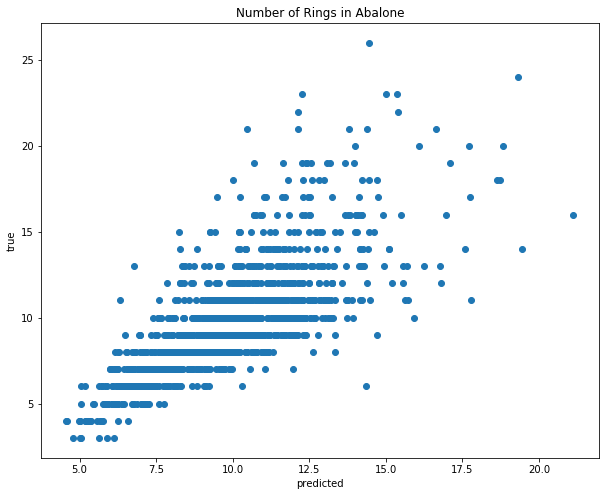

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(predicted, y_test)

ax.set_xlabel(r'predicted')
ax.set_ylabel(r'true')
ax.set_title("Number of Rings in Abalone")


plt.savefig('regression.png')
plt.show()

# 5. (Bonus) Try another regression classifier

Pick another regression classifier (e.g. try ridge, lasso, decision trees, nearest neighbors, ...) and repeat parts 3 and 4.  If you do this, name your image after the classifier you used e.g. `lasso.png`

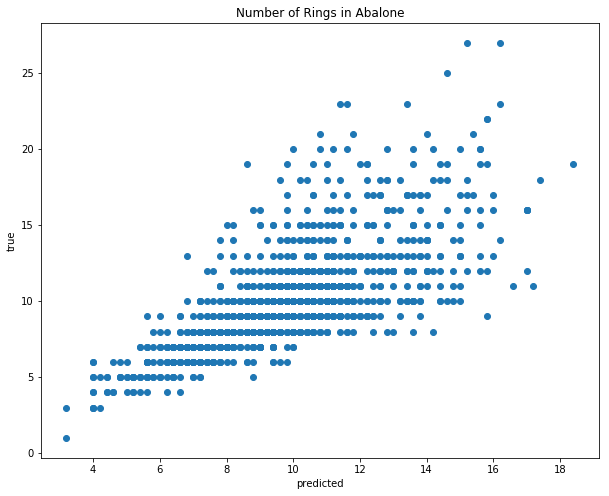

In [20]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNeighborsRegressor()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(predicted, y_test)

ax.set_xlabel(r'predicted')
ax.set_ylabel(r'true')
ax.set_title("Number of Rings in Abalone")


plt.savefig('knn.png')
plt.show()

In [21]:
model.score(X_test, y_test)

0.5085275861002256